# Language Model: Pretrained AWD_LSTM

In [1]:
import json
import pandas as pd

In [2]:
all_articles = {}
with open('/home/mbio_2021/html/output/output_0719_html.json') as json_file:
    data = json.load(json_file)
all_articles.update(data)

In [3]:
len(all_articles)

171238

In [4]:
# Remove empty articles and non-English articles
all_articles = {k:v for k,v in all_articles.items() if v!='Article NA'}
all_articles = {k:v for k,v in all_articles.items() if v['language']=='English'}

In [5]:
# Reduced by ~50%
len(all_articles)

91304

In [6]:
df = pd.DataFrame.from_dict(all_articles,orient='index')
# df[df['full text'].notnull()]
df.head()

,title,article,author,date,source,language,tag,original_url,full text
202003090171,South Africa: U.S. Chip Company Makes Charlize...,Oscar-winning actress Charlize Theron's love ...,By Alex Isaacs,9 March 2020,News24Wire (Cape Town),English,"[South Africa, Entertainment, Southern Africa]",https://www.channel24.co.za/Gossip/News/us-chi...,True
202003240252,South Africa: Lockdown - South Africa March 2020,"If we are to flatten the curve, reduce infect...",By Judith February,24 March 2020,Daily Maverick (Johannesburg),English,"[South Africa, Southern Africa, Health, Corona...",https://www.dailymaverick.co.za/opinionista/20...,True
202003160544,"Nigeria: Lawan, Gbajabiamila, Fayemi Commisera...","The Senate President, Dr. Ahmad Lawan; the Sp...","By Deji Elumoye, Chuks Okocha and Udora Orizu",16 March 2020,This Day (Lagos),English,"[Nigeria, West Africa, Business, Petroleum, Ur...",https://www.thisdaylive.com/index.php/2020/03/...,False
202003090205,Nigeria: COVID-19 - FAAN Strengthens Airport S...,Nigeria's effort to contain the coronavirus d...,By Sola Ogundipe,9 March 2020,Vanguard (Lagos),English,"[Nigeria, West Africa, Health, Coronavirus]",https://www.vanguardngr.com/2020/03/covid-19-f...,False
202003050298,Sudan: PM Appoints Commissioner for Social Sec...,"Khartoum — The Prime Minister, Dr. Abdallah H...",N/A,4 March 2020,Sudan News Agency (Khartoum),English,"[Sudan, East Africa, Governance]",https://suna-sd.net/en/single?id=582398,False


In [7]:
df.iloc[0]['tag']

['South Africa', 'Entertainment', 'Southern Africa']

In [8]:
# Create a string from the tags
df['liststring'] = [','.join(map(str, l)) for l in df['tag']]

In [9]:
# Get the indices of the articles with agri tags
indices = []
for i, tags in enumerate(df['liststring']):
    if 'Agribusiness' in tags or 'Food and Agriculture' in tags:
        indices.append(i)
# make column of 0 and 1 in df for appearance of that tag
ies = [0]*df.shape[0]
for x in indices:
    ies[x]+=1

In [10]:
# Create column for agribusines/food tech True or False
df['agri_label'] = ies

In [11]:
# 3% of articles have agri/foodag tag
sum(df['agri_label']==1), len(df), sum(df['agri_label']==1)/len(df)

(2695, 91304, 0.029516779111539472)

In [12]:
df.head(1)

,title,article,author,date,source,language,tag,original_url,full text,liststring,agri_label
202003090171,South Africa: U.S. Chip Company Makes Charlize...,Oscar-winning actress Charlize Theron's love ...,By Alex Isaacs,9 March 2020,News24Wire (Cape Town),English,"[South Africa, Entertainment, Southern Africa]",https://www.channel24.co.za/Gossip/News/us-chi...,True,"South Africa,Entertainment,Southern Africa",0


In [13]:
#df.to_csv('articles_sample.csv')

# Language Model

https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb

In [14]:
from fastai.text.all import *

In [15]:
torch.cuda.device_count()

4

In [16]:
# cudaSetDeviceis 0-index-based
torch.cuda.set_device(1)

In [17]:
# dataloader doesnt work with updated spacy version
# !pip install 'spacy==3.0.6' --force-reinstall

In [18]:
!pip show spacy

Name: spacy
Version: 3.0.6
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /home/echeungsutton/enter/lib/python3.8/site-packages
Requires: srsly, wasabi, tqdm, setuptools, murmurhash, spacy-legacy, preshed, numpy, pathy, requests, pydantic, jinja2, thinc, blis, catalogue, typer, packaging, cymem
Required-by: fastai, en-core-web-sm


In [19]:
!pip show torch

Name: torch
Version: 1.7.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/echeungsutton/enter/lib/python3.8/site-packages
Requires: numpy, typing-extensions
Required-by: torchvision, fastai


In [20]:
dls = TextDataLoaders.from_df(df, text_col='article',is_lm=True) # is_lm (creates label column from text)

/home/echeungsutton/enter/lib/python3.8/site-packages/pandas/core/common.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [21]:
dls.show_batch(max_n=3)

,text,text_
0,"xxbos xxup the xxmaj aare xxmaj ona xxmaj kakanfo of xxmaj yorubaland and xxmaj convener of xxmaj oodua xxmaj progressive xxmaj union , xxup opu , xxmaj iba xxmaj gani xxmaj adams , has formally launched the xxup opu xxmaj canada . xxmaj the event which was held in xxmaj toronto , xxmaj canada , had in attendance xxmaj nigerians , who are core professionals in the country . xxmaj notable personalities","xxup the xxmaj aare xxmaj ona xxmaj kakanfo of xxmaj yorubaland and xxmaj convener of xxmaj oodua xxmaj progressive xxmaj union , xxup opu , xxmaj iba xxmaj gani xxmaj adams , has formally launched the xxup opu xxmaj canada . xxmaj the event which was held in xxmaj toronto , xxmaj canada , had in attendance xxmaj nigerians , who are core professionals in the country . xxmaj notable personalities present"
1,", xxmaj visible xxmaj policing ( pops , xxup trt , xxmaj tracking xxmaj teams , etc . ) and xxmaj crime xxmaj intelligence ( intelligence gathering and analysis ) . xxmaj police station capacity will be a focus point and to this extent , 60 % of entry level recruitment posts will be allocated to stations . xxmaj currently , the allocated staff establishment at police stations , is 120 475","xxmaj visible xxmaj policing ( pops , xxup trt , xxmaj tracking xxmaj teams , etc . ) and xxmaj crime xxmaj intelligence ( intelligence gathering and analysis ) . xxmaj police station capacity will be a focus point and to this extent , 60 % of entry level recruitment posts will be allocated to stations . xxmaj currently , the allocated staff establishment at police stations , is 120 475 ."
2,tour for six months . xxmaj this was my first xxmaj grand xxmaj slam final after a couple of years . ' there was no better place to make my comeback . xxmaj this is a sacred place for tennis . i always dreamed of holding this trophy when i was a young boy . xxmaj the grass tasted really good . i had a double portion this year . ' xxmaj,for six months . xxmaj this was my first xxmaj grand xxmaj slam final after a couple of years . ' there was no better place to make my comeback . xxmaj this is a sacred place for tennis . i always dreamed of holding this trophy when i was a young boy . xxmaj the grass tasted really good . i had a double portion this year . ' xxmaj in


In [22]:
learn = language_model_learner(dls, AWD_LSTM, drop_mult=0.3,metrics=accuracy).to_fp16()

In [25]:
# try DataParallel
# this doesnt work... leads to ModelAttributeError
learn = language_model_learner(dls, AWD_LSTM, drop_mult=0.3,metrics=accuracy).to_fp16()
learn.model = nn.DataParallel(learn.model, device_ids=[0,1])

/home/echeungsutton/enter/lib/python3.8/site-packages/torch/nn/parallel/data_parallel.py:30: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  if warn_imbalance(lambda props: props.total_memory):


In [ ]:
# this also doesnt work
# learn = language_model_learner(dls, AWD_LSTM, drop_mult=0.3,metrics=accuracy).to_fp16().to_parallel(device_ids=[0,1])

### First layer

In [26]:
for name, param in learn.named_parameters(): 
    print(f"{name} gradient is set to", param.requires_grad)

module.0.encoder.weight gradient is set to True
module.0.rnns.0.weight_hh_l0_raw gradient is set to False
module.0.rnns.0.module.weight_ih_l0 gradient is set to False
module.0.rnns.0.module.bias_ih_l0 gradient is set to False
module.0.rnns.0.module.bias_hh_l0 gradient is set to False
module.0.rnns.1.weight_hh_l0_raw gradient is set to False
module.0.rnns.1.module.weight_ih_l0 gradient is set to False
module.0.rnns.1.module.bias_ih_l0 gradient is set to False
module.0.rnns.1.module.bias_hh_l0 gradient is set to False
module.0.rnns.2.weight_hh_l0_raw gradient is set to False
module.0.rnns.2.module.weight_ih_l0 gradient is set to False
module.0.rnns.2.module.bias_ih_l0 gradient is set to False
module.0.rnns.2.module.bias_hh_l0 gradient is set to False
module.1.decoder.bias gradient is set to True


In [35]:
# this does nothing, first layer already unfrozen
learn.freeze_to(-1)
for name, param in learn.named_parameters(): 
    print(f"{name} gradient is set to", param.requires_grad)

0.encoder.weight gradient is set to True
0.rnns.0.weight_hh_l0_raw gradient is set to False
0.rnns.0.module.weight_ih_l0 gradient is set to False
0.rnns.0.module.bias_ih_l0 gradient is set to False
0.rnns.0.module.bias_hh_l0 gradient is set to False
0.rnns.1.weight_hh_l0_raw gradient is set to False
0.rnns.1.module.weight_ih_l0 gradient is set to False
0.rnns.1.module.bias_ih_l0 gradient is set to False
0.rnns.1.module.bias_hh_l0 gradient is set to False
0.rnns.2.weight_hh_l0_raw gradient is set to False
0.rnns.2.module.weight_ih_l0 gradient is set to False
0.rnns.2.module.bias_ih_l0 gradient is set to False
0.rnns.2.module.bias_hh_l0 gradient is set to False
1.decoder.bias gradient is set to True


In [27]:
learn.lr_find()

ModuleAttributeError: 'DataParallel' object has no attribute 'reset'

In [37]:
learn.fit_one_cycle(10, slice(1e-3,1e-2), cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.002, patience=2))

epoch,train_loss,valid_loss,accuracy,time
0,3.605466,3.566176,0.351899,30:23
1,3.645279,3.605368,0.346146,30:06
2,3.649804,3.606225,0.346651,29:48


No improvement since epoch 0: early stopping


In [38]:
# create a file in learn.path/models/ named 1epoch.pth
learn.save('step1_rescrape2')

Path('models/step1_rescrape2.pth')

### Second Layer

In [39]:
learn = learn.load('step1_rescrape2')
learn.freeze_to(-2)
for name, param in learn.named_parameters(): 
    print(f"{name} gradient is set to", param.requires_grad)

0.encoder.weight gradient is set to True
0.rnns.0.weight_hh_l0_raw gradient is set to False
0.rnns.0.module.weight_ih_l0 gradient is set to False
0.rnns.0.module.bias_ih_l0 gradient is set to False
0.rnns.0.module.bias_hh_l0 gradient is set to False
0.rnns.1.weight_hh_l0_raw gradient is set to False
0.rnns.1.module.weight_ih_l0 gradient is set to False
0.rnns.1.module.bias_ih_l0 gradient is set to False
0.rnns.1.module.bias_hh_l0 gradient is set to False
0.rnns.2.weight_hh_l0_raw gradient is set to True
0.rnns.2.module.weight_ih_l0 gradient is set to True
0.rnns.2.module.bias_ih_l0 gradient is set to True
0.rnns.2.module.bias_hh_l0 gradient is set to True
1.decoder.bias gradient is set to True


SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=1.3182567499825382e-06)

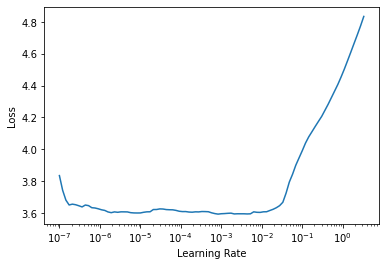

In [40]:
learn.lr_find()

In [41]:
learn.fit_one_cycle(10, slice(1e-3,1e-4), cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.002, patience=2))

epoch,train_loss,valid_loss,accuracy,time
0,3.500589,3.496666,0.359112,30:09
1,3.428811,3.420232,0.366420,30:03
2,3.409994,3.377402,0.370363,29:59
3,3.344827,3.354143,0.372728,30:03
4,3.368073,3.339105,0.374154,30:10
5,3.344988,3.329671,0.375157,30:22
6,3.349912,3.322869,0.375852,30:05
7,3.299461,3.318803,0.376363,30:25


No improvement since epoch 5: early stopping


In [42]:
learn.save('step2_rescrape2')

Path('models/step2_rescrape2.pth')

### Third Layer

In [19]:
learn = learn.load('step2_rescrape2')
learn.freeze_to(-3)
for name, param in learn.named_parameters(): 
    print(f"{name} gradient is set to", param.requires_grad)

0.encoder.weight gradient is set to True
0.rnns.0.weight_hh_l0_raw gradient is set to False
0.rnns.0.module.weight_ih_l0 gradient is set to False
0.rnns.0.module.bias_ih_l0 gradient is set to False
0.rnns.0.module.bias_hh_l0 gradient is set to False
0.rnns.1.weight_hh_l0_raw gradient is set to True
0.rnns.1.module.weight_ih_l0 gradient is set to True
0.rnns.1.module.bias_ih_l0 gradient is set to True
0.rnns.1.module.bias_hh_l0 gradient is set to True
0.rnns.2.weight_hh_l0_raw gradient is set to True
0.rnns.2.module.weight_ih_l0 gradient is set to True
0.rnns.2.module.bias_ih_l0 gradient is set to True
0.rnns.2.module.bias_hh_l0 gradient is set to True
1.decoder.bias gradient is set to True


SuggestedLRs(lr_min=4.78630090583465e-07, lr_steep=2.75422871709452e-06)

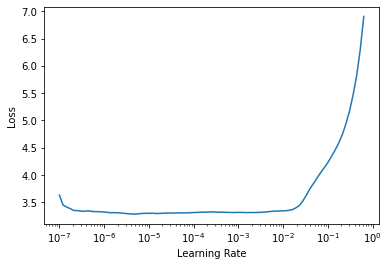

In [20]:
learn.lr_find()

In [21]:
learn.fit_one_cycle(10, slice(1e-5,1e-4), cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.002, patience=2))

epoch,train_loss,valid_loss,accuracy,time
0,3.321250,3.205077,0.385691,30:57
1,3.314022,3.194840,0.386883,31:02
2,3.317473,3.183781,0.388268,33:13
3,3.294149,3.174909,0.389393,31:02
4,3.262961,3.168823,0.390312,31:17
5,3.248237,3.164417,0.390810,31:04
6,3.243368,3.161390,0.391249,31:19


No improvement since epoch 4: early stopping


In [22]:
learn.save('step3_rescrape2')

Path('models/step3_rescrape2.pth')

### Last Layer

In [23]:
learn = learn.load('step3_rescrape2')
learn.freeze_to(-4)
for name, param in learn.named_parameters(): 
    print(f"{name} gradient is set to", param.requires_grad)

0.encoder.weight gradient is set to True
0.rnns.0.weight_hh_l0_raw gradient is set to True
0.rnns.0.module.weight_ih_l0 gradient is set to True
0.rnns.0.module.bias_ih_l0 gradient is set to True
0.rnns.0.module.bias_hh_l0 gradient is set to True
0.rnns.1.weight_hh_l0_raw gradient is set to True
0.rnns.1.module.weight_ih_l0 gradient is set to True
0.rnns.1.module.bias_ih_l0 gradient is set to True
0.rnns.1.module.bias_hh_l0 gradient is set to True
0.rnns.2.weight_hh_l0_raw gradient is set to True
0.rnns.2.module.weight_ih_l0 gradient is set to True
0.rnns.2.module.bias_ih_l0 gradient is set to True
0.rnns.2.module.bias_hh_l0 gradient is set to True
1.decoder.bias gradient is set to True


SuggestedLRs(lr_min=0.0001737800776027143, lr_steep=6.918309736647643e-06)

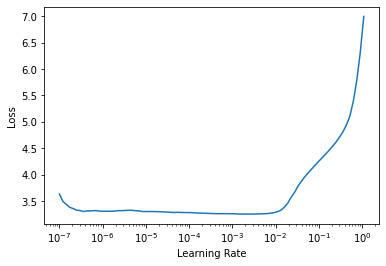

In [24]:
learn.lr_find()

In [25]:
learn.fit_one_cycle(6, slice(1e-4,1e-3), cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.002, patience=2))

epoch,train_loss,valid_loss,accuracy,time
0,3.252389,3.175390,0.389832,31:07
1,3.226136,3.162593,0.392252,31:03
2,3.132200,3.137602,0.395931,31:10
3,3.157165,3.114201,0.399220,30:42
4,3.090688,3.099256,0.401406,31:05
5,3.065546,3.096513,0.401932,30:58


In [27]:
learn.save('step4_rescrape2')

Path('models/step4_rescrape2.pth')

### Decrease LR

In [24]:
learn = learn.load('step4_rescrape2')
learn.freeze_to(-4)
for name, param in learn.named_parameters(): 
    print(f"{name} gradient is set to", param.requires_grad)

0.encoder.weight gradient is set to True
0.rnns.0.weight_hh_l0_raw gradient is set to True
0.rnns.0.module.weight_ih_l0 gradient is set to True
0.rnns.0.module.bias_ih_l0 gradient is set to True
0.rnns.0.module.bias_hh_l0 gradient is set to True
0.rnns.1.weight_hh_l0_raw gradient is set to True
0.rnns.1.module.weight_ih_l0 gradient is set to True
0.rnns.1.module.bias_ih_l0 gradient is set to True
0.rnns.1.module.bias_hh_l0 gradient is set to True
0.rnns.2.weight_hh_l0_raw gradient is set to True
0.rnns.2.module.weight_ih_l0 gradient is set to True
0.rnns.2.module.bias_ih_l0 gradient is set to True
0.rnns.2.module.bias_hh_l0 gradient is set to True
1.decoder.bias gradient is set to True


SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=1.9054607491852948e-06)

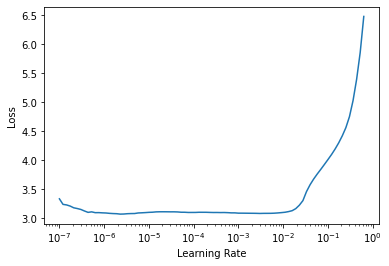

In [25]:
learn.lr_find()

In [24]:
# first try
learn.fit_one_cycle(10, slice(1e-7,1e-3), cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.002, patience=2))

epoch,train_loss,valid_loss,accuracy,time
0,3.134211,2.975631,0.413385,31:11
1,3.157407,3.022589,0.408435,31:26
2,3.181588,3.047114,0.406072,32:00


No improvement since epoch 0: early stopping


In [26]:
# second try
# saved this one
learn.fit_one_cycle(1, slice(1e-7,1e-3), cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.002, patience=2))

epoch,train_loss,valid_loss,accuracy,time
0,3.120638,2.994193,0.412372,30:57


In [27]:
learn.save('step5_rescrape2')

Path('models/step5_rescrape2.pth')

In [28]:
learn.load('step5_rescrape2')
learn.save_encoder('finetuned_rescrape2')

In [20]:
learn = learn.load_encoder('finetuned')

In [ ]:
TEXT = "the government"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [ ]:
print("\n".join(preds))